<a href="https://colab.research.google.com/github/Haffizuddin7899/-Using-Basic-AI-Techniques-to-Solve-Computer-Vision-Problems/blob/main/Buildings%2CPeopels%2CFood%2COthers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:
data_path = "/content/drive/MyDrive/Fiver/P3/Images"

In [ ]:
# Step 2: Load data using ImageDataGenerator and split into training, validation, and testing sets
from sklearn.model_selection import train_test_split

# Step 2: Load data using ImageDataGenerator and split into training, validation, and testing sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,     # Rotate images by 40 degrees
    width_shift_range=0.2, # Shift images horizontally by 20%
    height_shift_range=0.2,# Shift images vertically by 20%
    shear_range=0.2,       # Shear intensity
    zoom_range=0.2,        # Zoom range
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'    # Fill mode for filling in newly created pixels
)





In [ ]:
# Load all data without splitting
all_data_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    classes=['Buildings', 'Food', 'Other', 'People'],
    shuffle=True  # Shuffle the data
)




Found 2030 images belonging to 4 classes.


In [ ]:
# Split the data into training and validation sets
train_data, validation_data = train_test_split(all_data_generator, test_size=0.2, random_state=42)

# Further split the remaining data into training and testing sets
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=42)



KeyboardInterrupt: 

In [ ]:
# Define the generators for training, validation, and test sets
train_generator = train_data
validation_generator = validation_data
test_generator = test_data

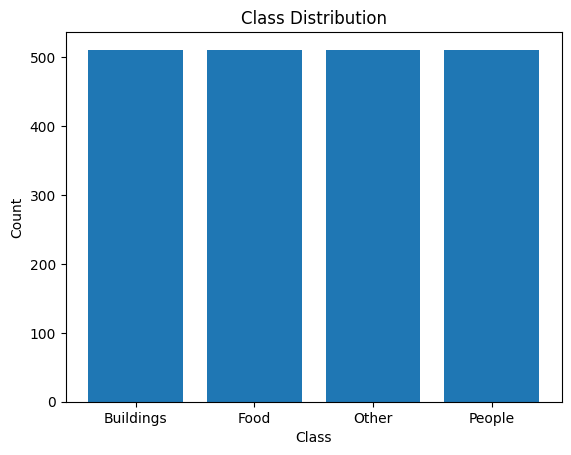

In [ ]:
# Step 3: Exploratory Data Analysis
# Step 3: Exploratory Data Analysis
classes=['Buildings', 'Food', 'Other', 'People']
class_counts = np.sum(train_generator.labels, axis=0)  # Count occurrences of each class label
plt.bar(classes, class_counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


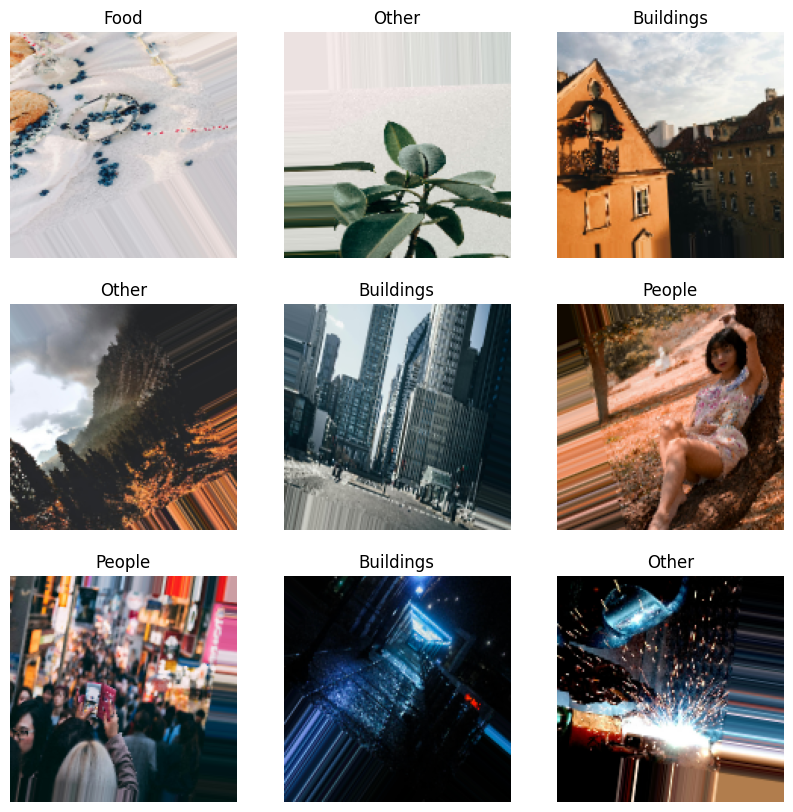

In [ ]:
# Show some exemplary images of all classes
sample_images = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[0][i])
    plt.title(classes[np.argmax(sample_images[1][i])])
    plt.axis('off')
plt.show()


In [ ]:
from keras.regularizers import l2

# Step 5: Create the model - Object Recognition System
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(len(classes), activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
# Step 6: Train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs = 10, validation_data = validation_generator)


Epoch 1/10
6/6 [==============================] - 79s 13s/step - loss: 2.5024 - accuracy: 0.2967 - val_loss: 2.2890 - val_accuracy: 0.2651
Epoch 2/10
6/6 [==============================] - 78s 13s/step - loss: 2.1398 - accuracy: 0.3412 - val_loss: 1.9914 - val_accuracy: 0.3253
Epoch 3/10
6/6 [==============================] - 81s 13s/step - loss: 1.9515 - accuracy: 0.3561 - val_loss: 1.7858 - val_accuracy: 0.3614
Epoch 4/10
6/6 [==============================] - 79s 12s/step - loss: 1.7632 - accuracy: 0.3887 - val_loss: 1.6995 - val_accuracy: 0.4217
Epoch 5/10
6/6 [==============================] - 78s 15s/step - loss: 1.6169 - accuracy: 0.4184 - val_loss: 1.5733 - val_accuracy: 0.4337
Epoch 6/10
6/6 [==============================] - 74s 12s/step - loss: 1.5390 - accuracy: 0.4481 - val_loss: 1.4764 - val_accuracy: 0.4699
Epoch 7/10
6/6 [==============================] - 79s 15s/step - loss: 1.4962 - accuracy: 0.4362 - val_loss: 1.4725 - val_accuracy: 0.4217
Epoch 8/10
6/6 [===========

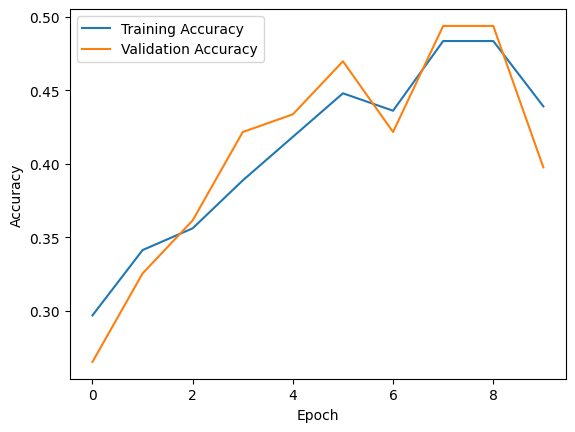

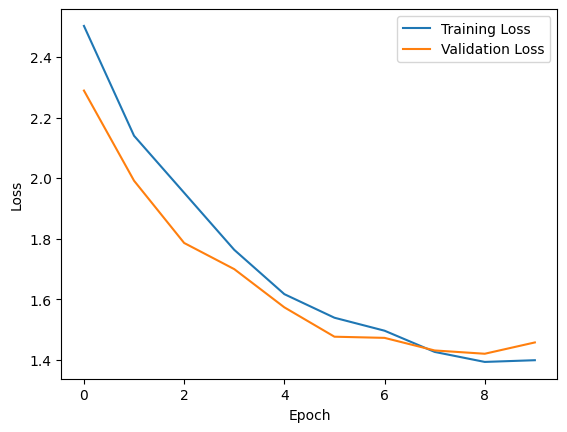

In [ ]:
# Step 8: Visualize the train and validation accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 [==============================] - 6s 738ms/step
Confusion Matrix:
[[ 5 12  0  3]
 [ 3 13  0  5]
 [ 6 13  0  2]
 [ 2 17  0  2]]


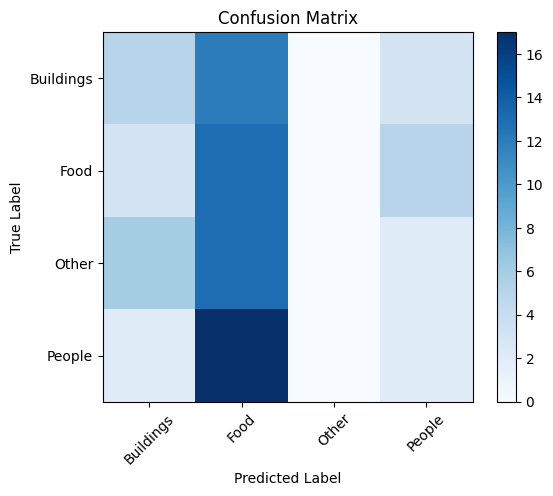


Classification Report:
              precision    recall  f1-score   support

   Buildings       0.31      0.25      0.28        20
        Food       0.24      0.62      0.34        21
       Other       0.00      0.00      0.00        21
      People       0.17      0.10      0.12        21

    accuracy                           0.24        83
   macro avg       0.18      0.24      0.19        83
weighted avg       0.18      0.24      0.18        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Step 7: Evaluate the model metrics including confusion matrix
# Predict classes for validation set
Y_pred = model.predict(validation_generator)
# Convert predictions to class labels
y_pred = np.argmax(Y_pred, axis=1)
# Get true labels
y_true = validation_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names = classes))


In [ ]:
def recognize_objects(model, image_path):
    from keras.preprocessing import image

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    # Make predictions
    predictions = model.predict(img_array)

    # Get predicted class label
    predicted_class = np.argmax(predictions)

    # Get class name based on class index
    class_names = ['People', 'Buildings', 'Food', 'Other']
    predicted_class_name = class_names[predicted_class]

    return predicted_class_name



In [ ]:
# Example usage:
image_path = '/content/drive/MyDrive/Fiver/p2/DATA/images/Buildings/b13.jpg'
predicted_class = recognize_objects(model, image_path)
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 62ms/step
Predicted class: Other
